# Comparing ReLU and Leaky ReLU
## Question 3
`ReLu`와 `leaky ReLu` 활성함수를 적용한 예제를 통하여 두가지 활성함수를 비교 분석합니다.

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import time

### 3-1 Relu
- `ReLu`에 대하여 살펴봅니다.

$$f(x) = max(0,x)$$

- x가 0보다 크면 기울기가 1인 직선, 0보다 작으면 함수 값이 0이 됨
- 하지만, 이는 0보다 작은 값들에서 뉴런이 죽을 수 있는 단점을 야기함

In [2]:
# ReLU Function
def ReLU(x):
    arr = []
    for i in x:
        if i<0:
            arr.append(0)
        else:
            arr.append(i)
    return arr

### 3-2 Leaky ReLu
- `leaky ReLu`에 대하여 살펴봅니다.

$$f(x) = max(λ*x,x)$$
$$λ는 매우 작은 값이라면 무엇이든 사용 가능함.$$

- Leaky ReLU는 ReLU가 갖는 Dying ReLU(뉴런이 죽는 현상) 을 해결하기 위해 나온 함수임
- Leaky ReLU는 x가 음수인 영역의 값에 대해 미분값이 0이 되지 않는다는 점을 제외하면 ReLU와 동일함

In [3]:
# Leaky ReLU Function
def LeakyReLU(x, alpha):
    arr = []
    for i in x:
        if i<0:
            arr.append(alpha*i)
        else:
            arr.append(i)
    return arr

### 3-3 Compare

**Visualization**

In [4]:
# Determining the intervals to be created for the graph
x = np.arange(-3., 3., 0.1)

relu = ReLU(x)
leaky_relu = LeakyReLU(x, 0.1)

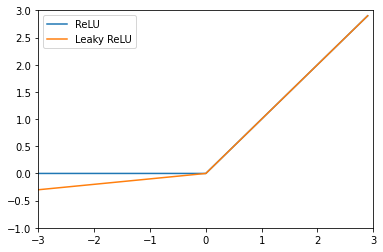

In [5]:
line_1 = plt.plot(x,relu, label='ReLU')
line_2 = plt.plot(x,leaky_relu, label='Leaky ReLU')

plt.legend()
plt.xlim(-3,3)
plt.ylim(-1,3)
plt.show()

**Model Result Comparision**

- MNIST 데이터 사용
- model은 이전 question1에서 사용한 모델과 동일한 모델을 사용합니다(Non-BatchNorm)

In [6]:
# import dataset
from tensorflow.keras.datasets import mnist

# Artificial Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LeakyReLU, ReLU

# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# label counts
num_labels = len(np.unique(y_train))

# one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# image dimensions
image_size = x_train.shape[1]
input_size = image_size * image_size

# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_test = np.reshape(x_test, [-1, input_size])

In [7]:
# set parameters
batch_size = 128
hidden_units = 300
dropout = 0.3
epoch = 50

In [8]:
epochs = np.arange(1,epoch+1)

In [9]:
# RELU MODEL
model_ReLU = Sequential()

# 1st Layer
model_ReLU.add(Dense(hidden_units, input_dim=input_size))
model_ReLU.add(ReLU())
model_ReLU.add(Dropout(dropout))

# 2nd Layer
model_ReLU.add(Dense(hidden_units))
model_ReLU.add(ReLU())
model_ReLU.add(Dropout(dropout))

# 2nd Layer
model_ReLU.add(Dense(num_labels))
model_ReLU.add(Activation('softmax'))

# 모형 컴파일(RELU)
model_ReLU.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [10]:
# 신경망 학습(ReLU)
start = time.time()
ReLU_hist = model_ReLU.fit(x_train, y_train, epochs=epoch, batch_size=batch_size)
end = time.time()
ReLU_time = end-start
print(ReLU_time)

Epoch 1/50
469/469 [==============================] - 1s 2ms/step - loss: 4.0775 - accuracy: 0.7593
Epoch 2/50
469/469 [==============================] - 1s 2ms/step - loss: 0.7635 - accuracy: 0.8399
Epoch 3/50
469/469 [==============================] - 1s 2ms/step - loss: 0.5694 - accuracy: 0.8766
Epoch 4/50
469/469 [==============================] - 1s 2ms/step - loss: 0.4597 - accuracy: 0.8959
Epoch 5/50
469/469 [==============================] - 1s 2ms/step - loss: 0.3804 - accuracy: 0.9110
Epoch 6/50
469/469 [==============================] - 1s 2ms/step - loss: 0.3157 - accuracy: 0.9232
Epoch 7/50
469/469 [==============================] - 1s 2ms/step - loss: 0.2761 - accuracy: 0.9323
Epoch 8/50
469/469 [==============================] - 1s 2ms/step - loss: 0.2467 - accuracy: 0.9374
Epoch 9/50
469/469 [==============================] - 1s 3ms/step - loss: 0.2234 - accuracy: 0.9426
Epoch 10/50
469/469 [==============================] - 1s 2ms/step - loss: 0.2093 - accuracy: 0.9437

In [16]:
ReLU_loss, ReLU_acc = model_ReLU.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy : %.3f" % (100.0 * ReLU_acc))
print("\nTest loss :%.5f" %(ReLU_loss))

79/79 [==============================] - 0s 1ms/step - loss: 0.1584 - accuracy: 0.9709

Test accuracy : 97.090

Test loss :0.15837


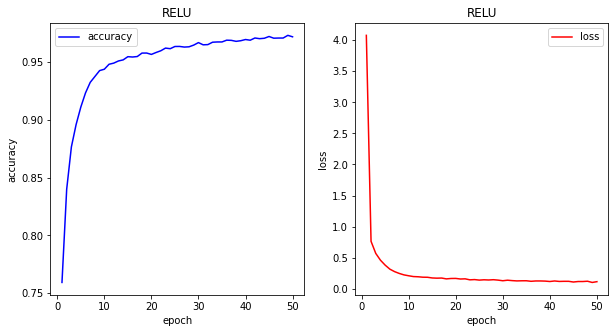

In [11]:
# RELU ACC/LOSS 그래프
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(epochs, ReLU_hist.history['accuracy'], label='accuracy', color = 'b')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('RELU')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, ReLU_hist.history['loss'], label='loss', color = 'r')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('RELU')
plt.legend()

plt.show()

In [12]:
# Leaky RELU MODEL
model_L_ReLU = Sequential()

# 1st Layer
model_L_ReLU.add(Dense(hidden_units, input_dim=input_size))
model_L_ReLU.add(LeakyReLU(alpha=0.1))
model_L_ReLU.add(Dropout(dropout))

# 2nd Layer
model_L_ReLU.add(Dense(hidden_units))
model_L_ReLU.add(Activation('relu'))
model_L_ReLU.add(Dropout(dropout))

# 2nd Layer
model_L_ReLU.add(Dense(num_labels))
model_L_ReLU.add(Activation('softmax'))

# 모형 컴파일(Leaky RELU)
model_L_ReLU.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [13]:
# 신경망 학습(Leaky ReLU)
start = time.time()
L_ReLU_hist = model_L_ReLU.fit(x_train, y_train, epochs=epoch, batch_size=batch_size)
end = time.time()
L_ReLU_time = end-start
print(L_ReLU_time)

Epoch 1/50
469/469 [==============================] - 1s 2ms/step - loss: 3.9715 - accuracy: 0.7855
Epoch 2/50
469/469 [==============================] - 1s 2ms/step - loss: 0.5914 - accuracy: 0.8516
Epoch 3/50
469/469 [==============================] - 1s 2ms/step - loss: 0.4100 - accuracy: 0.8873
Epoch 4/50
469/469 [==============================] - 1s 2ms/step - loss: 0.3414 - accuracy: 0.9067
Epoch 5/50
469/469 [==============================] - 1s 2ms/step - loss: 0.2960 - accuracy: 0.9175
Epoch 6/50
469/469 [==============================] - 1s 2ms/step - loss: 0.2706 - accuracy: 0.9249
Epoch 7/50
469/469 [==============================] - 1s 2ms/step - loss: 0.2419 - accuracy: 0.9309
Epoch 8/50
469/469 [==============================] - 1s 3ms/step - loss: 0.2355 - accuracy: 0.9339
Epoch 9/50
469/469 [==============================] - 1s 3ms/step - loss: 0.2326 - accuracy: 0.9360
Epoch 10/50
469/469 [==============================] - 1s 2ms/step - loss: 0.2180 - accuracy: 0.9403

In [17]:
L_ReLU_loss, L_ReLU_acc = model_L_ReLU.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy : %.3f" % (100.0 * L_ReLU_acc))
print("\nTest loss :%.5f" %(L_ReLU_loss))

79/79 [==============================] - 0s 1ms/step - loss: 0.2213 - accuracy: 0.9628

Test accuracy : 96.280

Test loss :0.22132


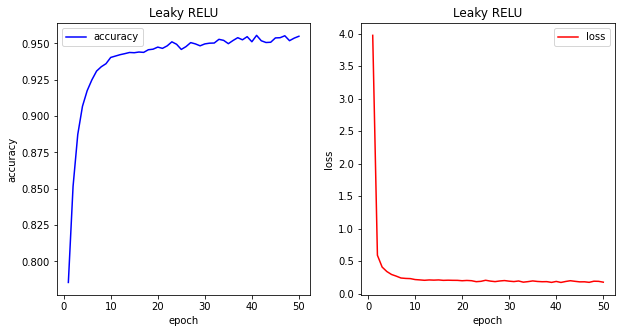

In [14]:
# RELU ACC/LOSS 그래프
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(epochs, L_ReLU_hist.history['accuracy'], label='accuracy', color = 'b')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Leaky RELU')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, L_ReLU_hist.history['loss'], label='loss', color = 'r')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Leaky RELU')
plt.legend()

plt.show()

- `Leaky ReLU`는 `ReLU`가 갖는 뉴런이 죽는 현상을 해결하기 위해 나온 함수임
- 본 실험에서는 `ReLU를 사용했을 때도 충분히 97.09%`라는 좋은 성능이 나왔고, 오히려 `Leaky ReLU 를 사용했을 때 96.28%`라는 성능이 나옴
- 아래 링크에 의하면, 오히려 ReLU로 인해 소실된 Gradient가 오히려 좋은 역할을 할 경우도 있다고 함

> 참고 : https://www.quora.com/Why-isnt-leaky-ReLU-always-preferable-to-ReLU-given-the-zero-gradient-for-x-0?top_ans=35703091